In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from textblob import TextBlob
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression, LogisticRegression

In [2]:
df = pd.read_csv("../raw_data/train.csv", nrows=100)

In [3]:
df = df.drop(columns=['ID', 'Place', 'location', 'date', 'status', 'job_title'])

In [4]:
df.head()

,summary,positives,negatives,advice_to_mgmt,score_1,score_2,score_3,score_4,score_5,score_6,overall
0,Best Company to work for,People are smart and friendly,Bureaucracy is slowing things down,NaN,4.0,5.0,5.0,4.0,5.0,0,5.0
1,"Moving at the speed of light, burn out is inev...","1) Food, food, food. 15+ cafes on main campus ...",1) Work/life balance. What balance? All those ...,1) Don't dismiss emotional intelligence and ad...,2.0,3.0,3.0,5.0,3.0,2094,5.0
2,Great balance between big-company security and...,"* If you're a software engineer, you're among ...","* It *is* becoming larger, and with it comes g...",Keep the focus on the user. Everything else wi...,5.0,4.0,5.0,5.0,4.0,949,5.0
3,The best place I've worked and also the most d...,You can't find a more well-regarded company th...,I live in SF so the commute can take between 1...,Keep on NOT micromanaging - that is a huge ben...,2.0,5.0,5.0,4.0,5.0,498,4.0
4,Execellent for engineers,Impact driven. Best tech in the world.,Size matters. Engineers are a bit disconnected...,NaN,5.0,5.0,5.0,5.0,5.0,0,4.0


In [5]:
text = df.summary + ' ' + df.positives + ' ' + df.negatives

df['text'] = text

df = df.dropna(axis=0)

df = df.drop_duplicates()

df.head()

,summary,positives,negatives,advice_to_mgmt,score_1,score_2,score_3,score_4,score_5,score_6,overall,text
1,"Moving at the speed of light, burn out is inev...","1) Food, food, food. 15+ cafes on main campus ...",1) Work/life balance. What balance? All those ...,1) Don't dismiss emotional intelligence and ad...,2.0,3.0,3.0,5.0,3.0,2094,5.0,"Moving at the speed of light, burn out is inev..."
2,Great balance between big-company security and...,"* If you're a software engineer, you're among ...","* It *is* becoming larger, and with it comes g...",Keep the focus on the user. Everything else wi...,5.0,4.0,5.0,5.0,4.0,949,5.0,Great balance between big-company security and...
3,The best place I've worked and also the most d...,You can't find a more well-regarded company th...,I live in SF so the commute can take between 1...,Keep on NOT micromanaging - that is a huge ben...,2.0,5.0,5.0,4.0,5.0,498,4.0,The best place I've worked and also the most d...
10,Accountant,I like and learned from the beginning accounting,High clerical work in the Sane record,Management and Finance must be close relation ...,5.0,5.0,5.0,5.0,5.0,0,4.0,Accountant I like and learned from the beginni...
21,Make sure you know what role you're applying for,"Employees, food, benefits, perks, shuttle, bas...","Company has become way too vertical, performan...","Stop putting people on a bell curve, and recog...",4.0,4.0,5.0,5.0,2.0,0,5.0,Make sure you know what role you're applying f...


In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import OneHotEncoder
from sklearn.naive_bayes import MultinomialNB

In [7]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df.text).toarray()

y = df.score_1.astype('uint8')

In [8]:
model = MultinomialNB()
model.fit(X, y)
model.score(X, y)

0.6818181818181818

In [9]:
df = pd.read_csv("../raw_data/train.csv", nrows=100)

df = df.drop(columns=['ID', 'Place', 'location', 'date', 'status', 'job_title', 'score_6'])

In [10]:
# drop rows with na values in score cols
score_cols = ['score_1', 'score_2', 'score_3', 'score_4', 'score_5', 'overall']
df = df.dropna(axis=0, subset=score_cols)
df = df.drop_duplicates()

In [11]:
# cast score cols as integers
float_cols = df.select_dtypes(float).columns
df[float_cols] = df[float_cols].astype('uint8')

In [12]:
df.head()

,summary,positives,negatives,advice_to_mgmt,score_1,score_2,score_3,score_4,score_5,overall
0,Best Company to work for,People are smart and friendly,Bureaucracy is slowing things down,NaN,4,5,5,4,5,5
1,"Moving at the speed of light, burn out is inev...","1) Food, food, food. 15+ cafes on main campus ...",1) Work/life balance. What balance? All those ...,1) Don't dismiss emotional intelligence and ad...,2,3,3,5,3,5
2,Great balance between big-company security and...,"* If you're a software engineer, you're among ...","* It *is* becoming larger, and with it comes g...",Keep the focus on the user. Everything else wi...,5,4,5,5,4,5
3,The best place I've worked and also the most d...,You can't find a more well-regarded company th...,I live in SF so the commute can take between 1...,Keep on NOT micromanaging - that is a huge ben...,2,5,5,4,5,4
4,Execellent for engineers,Impact driven. Best tech in the world.,Size matters. Engineers are a bit disconnected...,NaN,5,5,5,5,5,4


In [13]:
df.summary.shape

(77,)

In [14]:
feature_cols = ['summary', 'positives', 'negatives', 'advice_to_mgmt']

# combine all text columns
df['text_combined'] = df[feature_cols].astype('U').agg(' '.join, axis=1)

feature_cols.append('text_combined')

In [15]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df.text_combined).toarray()
y = df.score_1

In [16]:
model = MultinomialNB()
model.fit(X, y)
# append predictions to df
df['text_combined_score_1'] = model.predict(X)

In [17]:
model.score(X,y)

0.6363636363636364

In [18]:
# iterate over features and append results to df as new cols

result_scores = {}

for feature in feature_cols:
    scores_dic = {}
    
    for score in score_cols:
        vectorizer = TfidfVectorizer()
        X = vectorizer.fit_transform(df[feature].astype('U'))
        y = df[score]
        model = MultinomialNB()
        model.fit(X, y)
        df[f'{feature}_{score}'] = model.predict(X)
        scores_dic[f'{score}'] = model.score(X, y)
        
    result_scores[f'{feature}'] = scores_dic

In [19]:
df.head()

,summary,positives,negatives,advice_to_mgmt,score_1,score_2,score_3,score_4,score_5,overall,...,advice_to_mgmt_score_2,advice_to_mgmt_score_3,advice_to_mgmt_score_4,advice_to_mgmt_score_5,advice_to_mgmt_overall,text_combined_score_2,text_combined_score_3,text_combined_score_4,text_combined_score_5,text_combined_overall
0,Best Company to work for,People are smart and friendly,Bureaucracy is slowing things down,NaN,4,5,5,4,5,5,...,5,5,5,5,4,5,5,5,5,5
1,"Moving at the speed of light, burn out is inev...","1) Food, food, food. 15+ cafes on main campus ...",1) Work/life balance. What balance? All those ...,1) Don't dismiss emotional intelligence and ad...,2,3,3,5,3,5,...,5,5,5,3,5,5,5,5,4,5
2,Great balance between big-company security and...,"* If you're a software engineer, you're among ...","* It *is* becoming larger, and with it comes g...",Keep the focus on the user. Everything else wi...,5,4,5,5,4,5,...,5,5,5,4,5,5,5,5,4,5
3,The best place I've worked and also the most d...,You can't find a more well-regarded company th...,I live in SF so the commute can take between 1...,Keep on NOT micromanaging - that is a huge ben...,2,5,5,4,5,4,...,5,5,5,5,4,5,5,5,4,4
4,Execellent for engineers,Impact driven. Best tech in the world.,Size matters. Engineers are a bit disconnected...,NaN,5,5,5,5,5,4,...,5,5,5,5,4,5,5,5,5,4


In [20]:
result_scores

{'summary': {'score_1': 0.7142857142857143,
  'score_2': 0.7142857142857143,
  'score_3': 0.6623376623376623,
  'score_4': 0.7272727272727273,
  'score_5': 0.7402597402597403,
  'overall': 0.8181818181818182},
 'positives': {'score_1': 0.6363636363636364,
  'score_2': 0.6103896103896104,
  'score_3': 0.5844155844155844,
  'score_4': 0.7142857142857143,
  'score_5': 0.7402597402597403,
  'overall': 0.8701298701298701},
 'negatives': {'score_1': 0.6883116883116883,
  'score_2': 0.6103896103896104,
  'score_3': 0.6103896103896104,
  'score_4': 0.7142857142857143,
  'score_5': 0.7402597402597403,
  'overall': 0.8961038961038961},
 'advice_to_mgmt': {'score_1': 0.5454545454545454,
  'score_2': 0.6103896103896104,
  'score_3': 0.6103896103896104,
  'score_4': 0.7142857142857143,
  'score_5': 0.5064935064935064,
  'overall': 0.5064935064935064},
 'text_combined': {'score_1': 0.6363636363636364,
  'score_2': 0.6103896103896104,
  'score_3': 0.5714285714285714,
  'score_4': 0.7142857142857143,


In [21]:
# iterate over features and append results to df as new cols


scores_dic = {}
for score in score_cols:

    result_scores = {}
    for feature in feature_cols:
        vectorizer = TfidfVectorizer()
        X = vectorizer.fit_transform(df[feature].astype('U'))
        y = df[score]
        model = MultinomialNB()
        model.fit(X, y)
        df[f'{feature}_{score}'] = model.predict(X)
        result_scores[f'{feature}'] = model.score(X, y)
        
    scores_dic[f'{score}'] = result_scores

In [22]:
scores_df = pd.DataFrame(scores_dic).T

<AxesSubplot:>

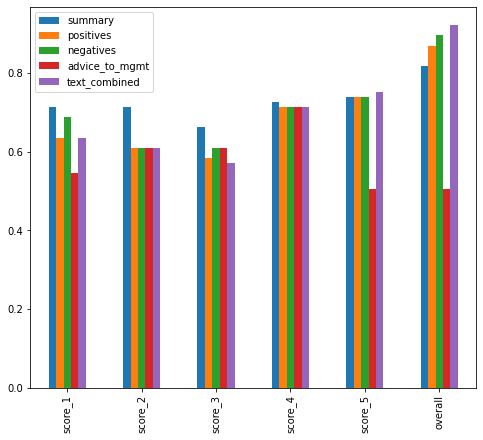

In [23]:
# visualise prediction capability of every text slice

fig = plt.figure(figsize=(8, 7))
ax = fig.add_subplot(1,1,1)
scores_df.plot(kind='bar', ax=ax)

In [24]:
# Create a function to get the subjectivity
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

# Create a function to get the polarity
def getPolarity(text):
  return TextBlob(text).sentiment.polarity

for feature in feature_cols:
    df[f'subjectivity_{feature}'] = df[feature].astype('U').apply(getSubjectivity)
    df[f'polarity_{feature}'] = df[feature].astype('U').apply(getPolarity)

In [25]:
# Create a function to get the total length of the reviews
def get_lengths(df):
    '''returns a df with columns with the length of the reviews'''
    func = lambda x: len(x) if type(x) == str else 0
    df['summary_length'] = df['summary'].apply(func)
    df['postives_length'] = df['positives'].apply(func)
    df['negatives_length'] = df['negatives'].apply(func)
    df['advice_length'] = df['advice_to_mgmt'].apply(func)
    df['combined_length'] = df['text_combined'].apply(func)
    return df

df = get_lengths(df)

In [26]:
# scale new features
length_cols = [col for col in df.columns if 'length' in col]

for col in length_cols:
    scaler = MinMaxScaler()
    df[col] = scaler.fit_transform(df[[col]])

In [27]:
# select X
X = df.iloc[:, 11:]

In [28]:
# scale score features
pred_scores_cols = [col for col in X.columns if 'score' in col and not 'reg' in col]

for col in pred_scores_cols:
    scaler = MinMaxScaler()
    X[col] = scaler.fit_transform(X[[col]])

In [58]:
# linear regression with just the predictions for each model
for col in score_cols:
    model = LinearRegression()
    model.fit(X, df[col])
    X[f'reg_{col}'] = model.predict(X)
    scaler = MinMaxScaler()
    X[f'reg_{col}'] = scaler.fit_transform(X[[f'reg_{col}']])
# classification with scores as targets
predictions = pd.DataFrame()
pred_scores = {}
for target in score_cols:
    model = LogisticRegression(max_iter=1000)
    y = df[target]
    model.fit(X, y)
    predictions[target] = model.predict(X)
    pred_scores[target] = model.score(X, y)
    

In [59]:
predictions

,score_1,score_2,score_3,score_4,score_5,overall
0,4,5,5,5,5,5
1,2,3,3,5,3,5
2,5,4,5,5,4,5
3,2,5,5,5,5,4
4,5,5,5,5,5,4
...,...,...,...,...,...,...
72,4,5,4,5,4,3
73,3,4,2,4,4,4
74,5,5,4,5,5,5
75,4,5,4,4,4,4


In [60]:
pred_scores

{'score_1': 0.961038961038961,
 'score_2': 0.8571428571428571,
 'score_3': 0.8311688311688312,
 'score_4': 0.8571428571428571,
 'score_5': 0.935064935064935,
 'overall': 0.961038961038961}

<BarContainer object of 6 artists>

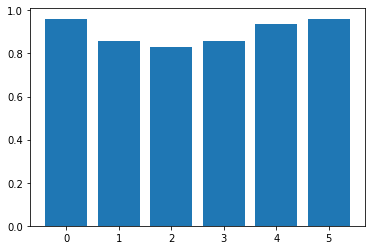

In [70]:
plt.bar(range(len(pred_scores)), list(pred_scores.values()), align='center')